\title{ Prototype IIR Direct form II Transpose in MyHDL->Verilog}
\author{Steven K Armour}
\maketitle

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Goals" data-toc-modified-id="Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goals</a></span></li><li><span><a href="#Scipy-Floating-Point-Target-Ex" data-toc-modified-id="Scipy-Floating-Point-Target-Ex-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scipy Floating Point Target Ex</a></span><ul class="toc-item"><li><span><a href="#Sympy-viewing-of-the-transfer-function" data-toc-modified-id="Sympy-viewing-of-the-transfer-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sympy viewing of the transfer function</a></span></li></ul></li><li><span><a href="#myHDL-topology-design-of-a-Direct-Form-II-Transpose-IIR-Filter" data-toc-modified-id="myHDL-topology-design-of-a-Direct-Form-II-Transpose-IIR-Filter-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>myHDL topology design of a Direct Form II Transpose IIR Filter</a></span></li><li><span><a href="#Topology-Diagram" data-toc-modified-id="Topology-Diagram-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Topology Diagram</a></span></li><li><span><a href="#DIITCapUnit" data-toc-modified-id="DIITCapUnit-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DIITCapUnit</a></span><ul class="toc-item"><li><span><a href="#Implementation-using-pure-python-as-ref" data-toc-modified-id="Implementation-using-pure-python-as-ref-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Implementation using pure python as ref</a></span></li><li><span><a href="#myHDL-implementation" data-toc-modified-id="myHDL-implementation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>myHDL implementation</a></span></li><li><span><a href="#myHDL-Simulation-Post-Processing-and-Reduction" data-toc-modified-id="myHDL-Simulation-Post-Processing-and-Reduction-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>myHDL Simulation Post Processing and Reduction</a></span></li><li><span><a href="#Pure-Python-and-myHDL-comparison" data-toc-modified-id="Pure-Python-and-myHDL-comparison-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Pure Python and myHDL comparison</a></span></li></ul></li><li><span><a href="#Delay-Exploration" data-toc-modified-id="Delay-Exploration-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Delay Exploration</a></span><ul class="toc-item"><li><span><a href="#Implementation-using-pure-python-as-ref" data-toc-modified-id="Implementation-using-pure-python-as-ref-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Implementation using pure python as ref</a></span></li><li><span><a href="#myHDL-implementation" data-toc-modified-id="myHDL-implementation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>myHDL implementation</a></span></li><li><span><a href="#myHDL-Simulation-Post-Processing-and-Reduction" data-toc-modified-id="myHDL-Simulation-Post-Processing-and-Reduction-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>myHDL Simulation Post Processing and Reduction</a></span></li><li><span><a href="#Pure-Python-and-myHDL-comparison" data-toc-modified-id="Pure-Python-and-myHDL-comparison-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Pure Python and myHDL comparison</a></span></li></ul></li><li><span><a href="#DIITUnit" data-toc-modified-id="DIITUnit-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>DIITUnit</a></span><ul class="toc-item"><li><span><a href="#Implementation-using-pure-python-as-ref" data-toc-modified-id="Implementation-using-pure-python-as-ref-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Implementation using pure python as ref</a></span></li><li><span><a href="#myHDL-implementation" data-toc-modified-id="myHDL-implementation-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>myHDL implementation</a></span></li><li><span><a href="#myHDL-Simulation-Post-Processing-and-Reduction" data-toc-modified-id="myHDL-Simulation-Post-Processing-and-Reduction-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>myHDL Simulation Post Processing and Reduction</a></span></li><li><span><a href="#Pure-Python-and-myHDL-comparison" data-toc-modified-id="Pure-Python-and-myHDL-comparison-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Pure Python and myHDL comparison</a></span></li></ul></li><li><span><a href="#IIR-Direct-II-Transpose" data-toc-modified-id="IIR-Direct-II-Transpose-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>IIR Direct-II Transpose</a></span></li><li><span><a href="#Q's-for-Chris-Felton," data-toc-modified-id="Q's-for-Chris-Felton,-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Q's for Chris Felton,</a></span></li></ul></div>

# Goals
The main goal is to create a simple IIR Filter in MyHDL that is synthesizable to Verilog and then implementable on an FPGA where the proposed target FPGA is the PYNQ-Z1 from Xilinx that uses a 32 bit ARM embedded FPGA.

The main goal is going to be meet in the following steps
1. Create a working IIR Direct II Transpose topology HDL code that is tested in myHDL. Where the emphasis is on the topology. (State: In Progress)

2. Implement an optimized coefficient quantization and correction scheme using scipy.optimize and the outputs from a floating point filter ex from scipy.signal and the outputs of the myHDL fixed-point simulation to minimize the error that introduces white nose and out of spec performance. (State: Background Research done; Implication at 0 percent)

3. Synthesis the filter on said FPGA and load the optimized coefficients from the PYNQ python to FPGA system (Stata: Not Started)

4. Test on an FIR Filter by zeroing the unused a coefficients

5. Add to the Python Filter Design Assistant https://github.com/chipmuenk/pyFDA 

# Scipy Floating Point Target Ex

In [2]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n = np.linspace(0, 1, 201)
x =np.zeros(n.shape)
x[20:30]=1.0

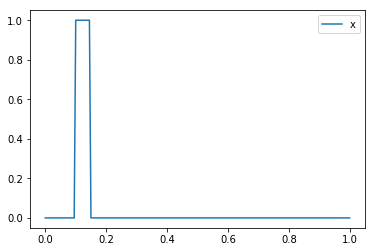

In [4]:
plt.plot(n, x, label='x')
plt.legend();

In [5]:
b, a = sig.butter(3, 0.05)
b, a

(array([0.00041655, 0.00124964, 0.00124964, 0.00041655]),
 array([ 1.        , -2.6861574 ,  2.41965511, -0.73016535]))

In [6]:
xf=sig.lfilter(b, a, x)

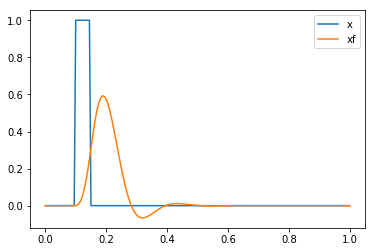

In [7]:
plt.plot(n, x, label='x')
plt.plot(n, xf, label='xf')
plt.legend();

## Sympy viewing of the transfer function

In [7]:
from sympy import *
init_printing()

In [8]:
z=symbols('z')

In [9]:
X=sum(np.array([j*z**(-i) for i, j in enumerate(x)]))

In [10]:
Y=sum(np.array([j*z**(-i) for i, j in enumerate(xf)]))

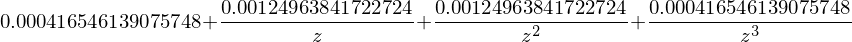

In [11]:
Num=sum([j*z**(-i) for i, j in enumerate(b)]); Num

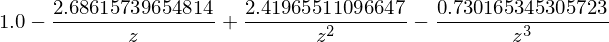

In [12]:
Den=sum([j*z**(-i) for i, j in enumerate(a)]); Den

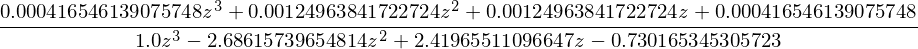

In [13]:
H=simplify(Num/Den); H

In [14]:
Err=(Y-simplify(H*X)).subs(z, 1); Err

In [15]:
len(a), len(b)

In [16]:
aMult=np.hstack((a[0], a[1:]*-1)); aMult

array([ 1.        ,  2.6861574 , -2.41965511,  0.73016535])

# myHDL topology design of a Direct Form II Transpose IIR Filter 

myHDL libraries

In [17]:
from myhdl import *
from myhdlpeek import Peeker
from itertools import product as product

BitWidth=32

http://www.eas.uccs.edu/~mwickert/ece2610/lecture_notes/ece2610_chap8.pdf

# Topology Diagram

<img src='IIRDIITStruct.jpg' >

# DIITCapUnit
<img src='IIRDIITCap.jpg'>
$$y=xb_0+L$$

## Implementation using pure python as ref

In [1]:
def DIITCRef(b, x, L):
    """
    IIR DIIT topmost(cap) section implemented in pure python as a reference
    
    Args:
        b(int, float): the mutiplying coefficient b_0
        x(int, float): the x input
        L(int, float): the L input
    Ret:
        y(int float): the y ouput of $y=xb_0+L$
    """
    y=x*b+L
    return y

In [19]:
# create test bVal and x, L inputs
bVal=2**(BitWidth/2); bVal
xVals=[0, 3, 10, 255]
LVals=[0, 3, 10, 255]

In [20]:
#run the test of the pure python imp of the cap as ref
#create the ref DF
DIITCapPySim=pd.DataFrame(columns=['x', 'L', 'y'])
for i, vals in enumerate(list(product(xVals, LVals))):
    DIITCapPySim.loc[i]=(list(vals)+[DIITCRef(bVal, *vals)])

#cast values to int
DIITCapPySim=DIITCapPySim.astype(int)
DIITCapPySim

,x,L,y
0,0,0,0
1,0,3,3
2,0,10,10
3,0,255,255
4,3,0,196608
5,3,3,196611
6,3,10,196618
7,3,255,196863
8,10,0,655360
9,10,3,655363


## myHDL implementation

In [21]:
def DIITC(x, y, L, b, clk, rst):
    """
    myHDL implementation of IIR DIIT cap section
    Inputs:
        x (bus): the x input exspecting a 2's Comp number
        L (bus): the L input exspecting a 2's Comp number
        b (bus): the b coefficient multiplayer value 
            exspecting a 2's Comp number
            
        -----------------------
        clk (wire): the clock input expecting a bool
        rst (wire): the reset signal expecting a bool
        
    Outputs:
        y (bus): the ouput of the Cap section $y=xb_0+L$
    """
    @always(clk.posedge)
    def logic():
        if rst:
            y.next=0
        else:
            y.next=x*b+L
    return logic

## myHDL Simulation Post Processing and Reduction 

In [22]:
#create signals and bind to Peeker
Peeker.clear()
x=Signal(intbv(0)[BitWidth:]); Peeker(x, 'x')
y=Signal(intbv(0)[BitWidth:]); Peeker(y, 'y')
L=Signal(intbv(0)[BitWidth:]); Peeker(L, 'L')
b=Signal(intbv(int(bVal))[BitWidth:]); Peeker(b, 'b')

clk, rst=[Signal(bool(0)) for _ in range(2)]
Peeker(clk, 'clk'); Peeker(rst, 'rst')

#instantiate the Cap as the DUT
DUT=DIITC(x, y, L, b, clk, rst)


def DIITC_TB():
    """
    The Cap section Testbench
    """
    
    #clock generator
    @always(delay(1))
    def clkGen():
        clk.next=not clk
    
    #the test stimulus
    @instance
    def stimulus():
        # run inputs from the DF used in the pure python testing
        # to then compare to in post processing of test
        for _, inputs in DIITCapPySim.iterrows():
            yield clk.posedge
            x.next, L.next, _=inputs
            
        # Test the reset
        for i in range(4):
            if i%2==0:
                x.next=1; L.next=1
                rst.next=1
            else:
                x.next=1; L.next=1
                rst.next=0
            yield clk.posedge
        
                
        # Completed test inputs and terminating simulation 
        raise StopSimulation

    return instances()
        


In [23]:
# Run the Simulation of the DUT according to DIITC_TB script
sim=Simulation(DUT, DIITC_TB(), *Peeker.instances()).run()
Peeker.to_wavedrom()

In [24]:
# use  the Peeker to Datafame to 
DIITCapTBD=Peeker.to_dataframe()
DIITCapTBD=DIITCapTBD.reindex(columns=['x', 'L', 'y', 'clk', 'rst', 'b'])
DIITCapTBD

,x,L,y,clk,rst,b
0,0,0,0,0,0,65536
1,0,0,0,1,0,65536
2,0,0,0,0,0,65536
3,0,3,0,1,0,65536
4,0,3,0,0,0,65536
5,0,10,3,1,0,65536
6,0,10,3,0,0,65536
7,0,255,10,1,0,65536
8,0,255,10,0,0,65536
9,3,0,255,1,0,65536


In [25]:
# Remove clock == 0 rows and the clk, b columns
DIITCapTBD=DIITCapTBD[DIITCapTBD.clk!=0]
DIITCapTBD.drop(['clk', 'b'], axis=1, inplace=True)
DIITCapTBD

** SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,x,L,y,rst
1,0,0,0,0
3,0,3,0,0
5,0,10,3,0
7,0,255,10,0
9,3,0,255,0
11,3,3,196608,0
13,3,10,196611,0
15,3,255,196618,0
17,10,0,196863,0
19,10,3,655360,0


In [26]:
# shift the y outputs back one clock cycle for easy I/O Comparison
DIITCapTBD['y']=DIITCapTBD.y.shift(-1, )
#reset the index
DIITCapTBD.reset_index(drop=True, inplace=True)
#drop the rst col and rows where rst was tested
DIITCapTBD.drop(['rst'], axis=1, inplace=True )
DIITCapTBD=DIITCapTBD.loc[:14]
#make all values ints since pandas wants to store inputs as float by def
DIITCapTBD=DIITCapTBD.astype(int)
DIITCapTBD

** SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
** SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,x,L,y
0,0,0,0
1,0,3,3
2,0,10,10
3,0,255,255
4,3,0,196608
5,3,3,196611
6,3,10,196618
7,3,255,196863
8,10,0,655360
9,10,3,655363


## Pure Python and myHDL comparison

In [27]:
#use an outer table join to check if the python and myHDL implementation
# match
DIITCapConfirDF=DIITCapPySim.loc[:14].merge(DIITCapTBD, indicator=True, how='outer')
DIITCapConfirDF.rename(index=str, columns={"_merge": "Sim&TB"})

,x,L,y,Sim&TB
0,0,0,0,both
1,0,3,3,both
2,0,10,10,both
3,0,255,255,both
4,3,0,196608,both
5,3,3,196611,both
6,3,10,196618,both
7,3,255,196863,both
8,10,0,655360,both
9,10,3,655363,both


confirmation the myHDL simulation matches the python implementation of the cap section of the IIR DIIT section 

# Delay Exploration
$$Y=Z^{-1}X$$
$$y=x(n-1)$$

## Implementation using pure python as ref

In [28]:
class DelayPy():
    """
    Class to simulated a HDL delay in pure python
    """
    def __init__(self):
        """
        setup the internal storage
        """
        self.y=0
        self.x=0
        
    def Action(self,x):
        """
        Perform the load and grab last output of action of a delay
        
        Args:
            x(float, int): the input to the delay
        Ret:
            y(float, int): the output of the delay accoring to $y=x(n-1)$
        """
        self.y=self.x
        self.x=x
        return self.y

In [29]:
# Create the Test Delay instance
TestDelay=DelayPy()

#synthesis the test data
DelayTestData=np.zeros(20)
DelayTestData[1]=1; DelayTestData[4]=4; DelayTestData[7]=7
DelayTestData[11]=11

# test the pure python code
Yout=[]
for i in DelayTestData:
    Yout.append(TestDelay.Action(i))

#bind the results into a dataframe for compersion to the myDHL later
DelayTestDF=pd.DataFrame(columns=['x', 'y'])
DelayTestDF['x']=DelayTestData; DelayTestDF['y']=pd.Series(Yout)
#back shift the y by one row to compare I/O to cheack for distortion  
DelayTestDF['y-1']=DelayTestDF.y.shift(-1)
DelayTestDF.dropna(inplace=True)

#recast all values as int since pandas defaults to floats
DelayTestDF=DelayTestDF.astype(int)
DelayTestDF

,x,y,y-1
0,0,0,0
1,1,0,1
2,0,1,0
3,0,0,0
4,4,0,4
5,0,4,0
6,0,0,0
7,7,0,7
8,0,7,0
9,0,0,0


## myHDL implementation

In [30]:
def Delay(x, y, clk, rst):
    '''
        Z delay bulding block for a CIC filter
        
        Inputs:
            x (but): the x(n) data in feed

            -----------------------
            
            clk(bool): clock feed
            rst(bool): reset feed
        
        Outputs:
            y (data):  the y(n+1) output of y(n+1)=x(n)
            
    '''
    @always(clk.posedge)
    def logic():
        if rst:
            y.next=0
        else:
            y.next=x
    return logic

## myHDL Simulation Post Processing and Reduction 


In [31]:
#create signals and bind to Peeker
Peeker.clear()
x=Signal(intbv(0)[BitWidth:]); Peeker(x, 'x')
y=Signal(intbv(0)[BitWidth:]); Peeker(y, 'y')
clk, rst=[Signal(bool(0)) for _ in range(2)]
Peeker(clk, 'clk'); Peeker(rst, 'rst')

#instantiate the Delay as the DUT
DUT=Delay(x, y, clk, rst)


def Delay_TB():
    
    #clock generator
    @always(delay(1))
    def clkGen():
        clk.next=not clk
    
    #the test stimulus
    @instance
    def stimulus():
        # run inputs from the DF used in the pure python testing
        # to then compare to in post processing of test
        for _, inputs in DelayTestDF.iterrows():
            yield clk.posedge
            x.next,_, _=inputs
            
        # Test the reset
        for i in range(4):
            if i%2==0:
                x.next=1; L.next=1
                rst.next=1
            else:
                x.next=1; L.next=1
                rst.next=0
            yield clk.posedge
        
                
        # Completed test inputs and terminating simulation    
        raise StopSimulation

    return instances()

In [32]:
# Run the Simulation of the DUT according to Delay_TB script
sim=Simulation(DUT, Delay_TB(), *Peeker.instances()).run()
Peeker.to_wavedrom()

In [33]:
# use  the Peeker to Datafame to 
DealyTBD=Peeker.to_dataframe()
DealyTBD

,clk,rst,x,y
0,0,0,0,0
1,1,0,0,0
2,0,0,0,0
3,1,0,1,0
4,0,0,1,0
5,1,0,0,1
6,0,0,0,1
7,1,0,0,0
8,0,0,0,0
9,1,0,4,0


In [34]:
# Remove clock == 0 rows and the clk columns
DealyTBD=DealyTBD[DealyTBD.clk!=0]
DealyTBD.drop(['clk'], axis=1, inplace=True)

# shift the y outputs back one clock cycle for easy I/O Comparison
DealyTBD['y-1']=DealyTBD.y.shift(-1)

#reset the col indexs
DealyTBD.reset_index(drop=True, inplace=True)
#make all values ints since pandas wants to store inputs as float by def
DealyTBD=DealyTBD.loc[:17].astype(int)
#drop the rst column
DealyTBD.drop(['rst'], axis=1, inplace=True)
DealyTBD

** SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
** SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,x,y,y-1
0,0,0,0
1,1,0,1
2,0,1,0
3,0,0,0
4,4,0,4
5,0,4,0
6,0,0,0
7,7,0,7
8,0,7,0
9,0,0,0


## Pure Python and myHDL comparison

** UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


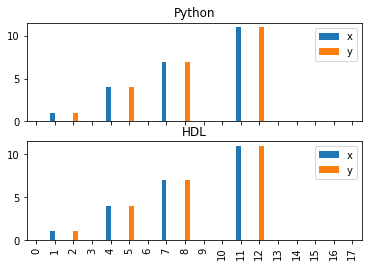

In [35]:
fig, [simAx,TestAx]=plt.subplots(ncols=1, nrows=2, sharex=True)
simAx.set_title('Python')
DelayTestDF.plot(y=['x', 'y'], kind='bar', ax=simAx)
TestAx.set_title('HDL')

DealyTBD.plot(y=['x', 'y'], kind='bar', ax=TestAx)

Graphs shows that the pure python and the myHDL version of the delay are 1-to-1

# DIITUnit
<img src='IIRDIITUnit.jpg'>
$$U=Z^{-1}(xb_i+ya_i+L)$$

## Implementation using pure python as ref

In [47]:
class DIITREf():
    def __init__(self,a, b):
        self.a=a; self.b=b
        self.S=[]
        self.ZRet=[0]
        
    def Add(self, x, y, L):
        self.S.append(-self.a*y +self.b*x +L)
    
    def Delay(self):
        self.ZRet.append(self.S[-1])
        self.R=self.ZRet[-2]
    
    def Action(self,x, y, L):
        self.Add(x, y, L)
        self.Delay()
        return self.R

In [48]:
aVal=2**(BitWidth/4)

Test=DIITREf(2, 3)
Test.Add(1,1,0); print(Test.S)
Test.Add(1, 1, 1); print(Test.S)
print(Test.ZRet)
Test.Delay(); print(Test.ZRet, Test.R)
Test.Delay(); print(Test.ZRet, Test.R)
Test.Action(2, 3, 4)
Test.Action(4,5,6)

[5]
[5, 6]
[0]
[0, 6] 0
[0, 6, 6] 6


In [49]:
TestDIITREf=DIITREf(aVal, bVal)
DIITUPySim=pd.DataFrame(columns=['x', 'y', 'L', 'U'])

for i , vals in enumerate(list(product(xVals, DIITCapPySim['y'], LVals))):
    DIITUPySim.loc[i]=(list(vals)+[TestDIITREf.Action(*vals)])
DIITUPySim

,x,y,L,U
0,0,0,0,0
1,0,0,3,0
2,0,0,10,3
3,0,0,255,10
4,0,3,0,255
5,0,3,3,768
6,0,3,10,771
7,0,3,255,778
8,0,10,0,1023
9,0,10,3,2560


In [50]:
DIITUPySim['U-1']=DIITUPySim.U.shift(-1)
DIITUPySim.dropna(inplace=True)
DIITUPySim=DIITUPySim.astype(int)
DIITUPySim.head(10)

,x,y,L,U,U-1
0,0,0,0,0,0
1,0,0,3,0,3
2,0,0,10,3,10
3,0,0,255,10,255
4,0,3,0,255,768
5,0,3,3,768,771
6,0,3,10,771,778
7,0,3,255,778,1023
8,0,10,0,1023,2560
9,0,10,3,2560,2563


## myHDL implementation

In [51]:
def DIITU(x, y, L, U, a, b, clk, rst):
    
    #the sum before delay
    #Sum=Signal(modbv(0)[BitWidth:])
    
    @always(clk.posedge)
    def logic():
        if rst:
            U.next=0
        else:
            #call the last val in Sum to act as delay
            #U.next=Sum
            #Sum input
            U.next=L+x*b-y*a
    return instances()
        

## myHDL Simulation Post Processing and Reduction 


In [65]:
Peeker.clear()
x=Signal(intbv(0)[BitWidth:]); Peeker(x, 'x')
y=Signal(intbv(0)[BitWidth:]); Peeker(y, 'y')
L=Signal(intbv(0)[BitWidth:]); Peeker(L, 'L')
U=Signal(intbv(0)[BitWidth:]); Peeker(U, 'U')
a=Signal(intbv(int(aVal))[BitWidth:]); Peeker(a, 'a')
b=Signal(intbv(int(bVal))[BitWidth:]); Peeker(b, 'b')
clk, rst=[Signal(bool(0)) for _ in range(2)]
Peeker(clk, 'clk'); Peeker(rst, 'rst')

DUT=DIITU(x, y, L, U, a, b, clk, rst)


def DIITU_TB():
    
    @always(delay(1))
    def clkGen():
        clk.next=not clk
    
    @instance
    def stimulus():
        for _, inputs in DIITUPySim.iterrows():
            yield clk.posedge
            
            x.next, y.next, L.next, _, _=inputs
            #print(x, y, L)
            #print(inputs)
            
        
        for i in range(4):
            if i%2==0:
                x.next=1; L.next=1
                rst.next=1
            else:
                x.next=1; L.next=1
                rst.next=0
            yield clk.posedge
        
                
            
        raise StopSimulation

    return instances()

In [83]:
sim=Simulation(DUT, DIITU_TB(), *Peeker.instances()).run()
Peeker.to_wavedrom()

In [84]:
Peeker.to_dataframe().reindex(columns=['x', 'y', 'L', 'U', 'clk', 'rst', 'a','b'])

,x,y,L,U,clk,rst,a,b
0,0,0,0,0,0,0,256,65536
1,0,0,0,0,1,0,256,65536
2,0,0,0,0,0,0,256,65536
3,0,0,3,0,1,0,256,65536
4,0,0,3,0,0,0,256,65536
5,0,0,10,3,1,0,256,65536
6,0,0,10,3,0,0,256,65536
7,0,0,255,10,1,0,256,65536
8,0,0,255,10,0,0,256,65536
9,0,3,0,255,1,0,256,65536


limit_output extension: Maximum message size of 10000 exceeded with 12110 characters

In [85]:
DIITUTBD=Peeker.to_dataframe()
DIITUTBD=DIITUTBD.reindex(columns=['x', 'y', 'L', 'U', 'clk', 'rst', 'a','b'])
DIITUTBD.head(11)

,x,y,L,U,clk,rst,a,b
0,0,0,0,0,0,0,256,65536
1,0,0,0,0,1,0,256,65536
2,0,0,0,0,0,0,256,65536
3,0,0,3,0,1,0,256,65536
4,0,0,3,0,0,0,256,65536
5,0,0,10,3,1,0,256,65536
6,0,0,10,3,0,0,256,65536
7,0,0,255,10,1,0,256,65536
8,0,0,255,10,0,0,256,65536
9,0,3,0,255,1,0,256,65536


In [86]:
DIITUTBD.drop(['a', 'b'], axis=1, inplace=True)
DIITUTBD=DIITUTBD[DIITUTBD.clk!=0]
DIITUTBD.drop(['clk'], axis=1, inplace=True)
DIITUTBD.head(11)

,x,y,L,U,rst
1,0,0,0,0,0
3,0,0,3,0,0
5,0,0,10,3,0
7,0,0,255,10,0
9,0,3,0,255,0
11,0,3,3,768,0
13,0,3,10,771,0
15,0,3,255,778,0
17,0,10,0,1023,0
19,0,10,3,2560,0


In [87]:
DIITUTBD['U-1']=DIITUTBD.U.shift(-1)
DIITUTBD.dropna(inplace=True)
DIITUTBD.reset_index(drop=True, inplace=True)
DIITUTBD.head(10)

,x,y,L,U,rst,U-1
0,0,0,0,0,0,0.0
1,0,0,3,0,0,3.0
2,0,0,10,3,0,10.0
3,0,0,255,10,0,255.0
4,0,3,0,255,0,768.0
5,0,3,3,768,0,771.0
6,0,3,10,771,0,778.0
7,0,3,255,778,0,1023.0
8,0,10,0,1023,0,2560.0
9,0,10,3,2560,0,2563.0


In [88]:
DIITUTBD=DIITUTBD.loc[:254]
DIITUTBD.drop(['rst'], axis=1, inplace=True)
DIITUTBD=DIITUTBD.astype(int)
DIITUTBD.head(10)

,x,y,L,U,U-1
0,0,0,0,0,0
1,0,0,3,0,3
2,0,0,10,3,10
3,0,0,255,10,255
4,0,3,0,255,768
5,0,3,3,768,771
6,0,3,10,771,778
7,0,3,255,778,1023
8,0,10,0,1023,2560
9,0,10,3,2560,2563


## Pure Python and myHDL comparison

In [95]:
DIITUConfirDF=DIITUPySim.loc[:253].merge(DIITUTBD, indicator=True, how='outer')
DIITUConfirDF.rename(index=str, columns={"_merge": "Sim&TB"})
DIITUConfirDF

,x,y,L,U,U-1,_merge
0,0,0,0,0,0,both
1,0,0,3,0,3,both
2,0,0,10,3,10,both
3,0,0,255,10,255,both
4,0,3,0,255,768,both
5,0,3,3,768,771,both
6,0,3,10,771,778,both
7,0,3,255,778,1023,both
8,0,10,0,1023,2560,both
9,0,10,3,2560,2563,both


limit_output extension: Maximum message size of 10000 exceeded with 10357 characters

# IIR Direct-II Transpose

# Q's for Chris Felton, 

Here are the Q's I have
\begin{itemize}
\item When I wire the individual sections of the DIIT will I be introducing a "Parasitic Delay" that was not intended the confusion arises from the fact the `Signal` is used to make registers which is a delay 

\item My sampling theory sucks. When I am setting the clock gen and the delay what is the sampling frequency that I am generating. Or am I even generating a sampling rate? If I am not generating a true sampling rate then can I just remove the 0 clock times from the peeker results and apply a Z transform to the results without having to expand the Z transform to the discrete Fourier transform

\item in Xilinx ZYNQ are they using 2's complement on the AXI bus. The reason I want to know is the I want to sent data and coefficients from the Python via PYNQ have the FPGA do its voodoo and sent back the results but I am not clear on what number system is on the ZYNQ since you can use multiple IPs where some of them employ that horde VHDL IEE floating point BS 

\item And just real quickly your thoughts on using scipy scipy.optimize.basinhopping to perform coefficient correction to get the qualification as best as possible since the Q process introduces Gaussian noise source whose amplitude is on par with the Q error. It seems to me that if the simulation was wrapped correctly into the cost function then though either scipy or some sort of machine learning the quantification can be made as ideal as possible. Yeah, python coiling around everything. Your Thoughts?
\end{itemize}
